In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from scipy.signal import savgol_filter
from matplotlib import pyplot
import matplotlib.pyplot as plt


In [2]:
## IMPORT DATA
df = pd.read_csv(r'C:\Users\HP\Desktop\Syahira\acetone\baseline_ace.csv')
df



,ppm,time,base_l1,base_l2,base_l3,base_s1,base_s2,base_s3
0,0.0,1,321.024735,323.939755,429.968455,1661.382112,1216.294643,1505.801105
1,0.0,2,319.757433,322.064618,433.121356,1612.623275,1211.555557,1514.259258
2,0.0,3,321.704054,323.574822,427.969650,1662.296747,1222.047832,1473.243244
3,0.0,4,319.106167,323.594616,430.568721,1632.534929,1205.604719,1481.159420
4,0.0,5,320.926580,324.692093,434.582669,1612.524656,1243.911720,1514.444444
...,...,...,...,...,...,...,...,...
1029,6.0,1030,316.937985,317.190532,423.898392,1593.274854,1233.484163,1457.754012
1030,6.0,1031,314.321415,319.519343,423.742871,1593.469787,1216.443453,1465.232974
1031,6.0,1032,316.086620,320.289855,424.402907,1622.321428,1169.384836,1489.435336
1032,6.0,1033,316.086620,320.133176,423.110766,1583.720929,1159.290780,1457.308378


In [3]:
df.iloc[:,1:8]
df1 = df.iloc[:,1:8]
df1

,time,base_l1,base_l2,base_l3,base_s1,base_s2,base_s3
0,1,321.024735,323.939755,429.968455,1661.382112,1216.294643,1505.801105
1,2,319.757433,322.064618,433.121356,1612.623275,1211.555557,1514.259258
2,3,321.704054,323.574822,427.969650,1662.296747,1222.047832,1473.243244
3,4,319.106167,323.594616,430.568721,1632.534929,1205.604719,1481.159420
4,5,320.926580,324.692093,434.582669,1612.524656,1243.911720,1514.444444
...,...,...,...,...,...,...,...
1029,1030,316.937985,317.190532,423.898392,1593.274854,1233.484163,1457.754012
1030,1031,314.321415,319.519343,423.742871,1593.469787,1216.443453,1465.232974
1031,1032,316.086620,320.289855,424.402907,1622.321428,1169.384836,1489.435336
1032,1033,316.086620,320.133176,423.110766,1583.720929,1159.290780,1457.308378


In [13]:
x = df1.time
y = df1.base_l2

In [14]:
#NORMALIZE DATA
def NormalizeData(df1):
    return (df1 - np.min(df1)) / (np.max(df1) - np.min(df1))

df_new = NormalizeData(y)
df_new

0       0.922912
1       0.730778
2       0.885520
3       0.887548
4       1.000000
5       0.800884
6       0.742890
7       0.490367
8       0.703915
9       0.777916
10      0.742890
11      0.808978
12      0.457967
13      0.761748
14      0.740871
15      0.724723
16      0.528862
17      0.610148
18      0.693834
19      0.608136
20      0.165783
21      0.267250
22      0.679720
23      0.608136
24      0.614171
25      0.624228
26      0.530869
27      0.453963
28      0.746927
29      0.319164
30      0.151899
31      0.724723
32      0.455965
33      0.299237
34      0.587539
35      0.724723
36      0.516423
37      0.628251
38      0.608136
39      0.699882
40      0.500388
41      0.542909
42      0.614171
43      0.530869
44      0.608136
45      0.685769
46      0.693834
47      0.379415
48      0.524848
49      0.569457
50      0.128155
51      0.614171
52      0.636297
53      0.689801
54      0.610148
55      0.571466
56      0.624228
57      0.726741
58      0.6081

In [8]:
df_new.keys()

RangeIndex(start=0, stop=1034, step=1)

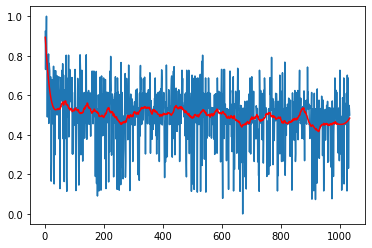

In [15]:
x = df1.time
y = df_new

yhat = savgol_filter(y, 81, 3) # window size 51, polynomial order 3

plt.plot(x,y)
plt.plot(x,yhat, color='red')
plt.show()

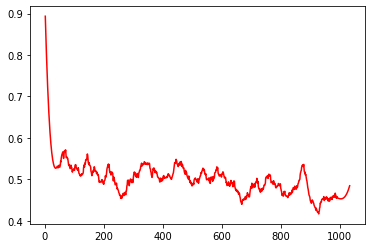

In [18]:
plt.plot(x,yhat, color='red')
plt.show()

In [19]:
pd.set_option('display.max_rows', None)
df2 = pd.DataFrame(yhat)
df2

,0
0,0.893438
1,0.868433
2,0.844537
3,0.821726
4,0.799979
5,0.779270
6,0.759579
7,0.740880
8,0.723152
9,0.706370
